In [7]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import train_test_split. Crossval score. Gridsearch CV
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold

# Import metrics
from sklearn import metrics

# Import Pipeline
from sklearn.pipeline import Pipeline

# Import models

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier


# Import CountVectorizer and TFIDFVectorizer from feature_extraction.text.
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.datasets import make_classification

from sklearn.metrics import classification_report, accuracy_score

from sklearn.svm import LinearSVC, SVC


In [8]:
df = pd.read_csv('../data/numeric_text_combined.csv')

In [9]:
df.head()

,protestnumber,protesterviolence,participants,stateresponse,labor wage dispute,land farm issue,police brutality,"political behavior, process","price increases, tax policy",removal of politician,...,yesterday morning,yesterday protest,yesterday thousand,young,young men,young people,youth,yugoslavia,zimbabwe,zone
0,1,0.0,3000,ignore,1,0,0,1,0,0,...,0.0,0.0,0.0,0.00000,0.0,0.00000,0.0,0.0,0.0,0.0
1,2,0.0,1000,ignore,0,0,0,1,0,0,...,0.0,0.0,0.0,0.36621,0.0,0.47086,0.0,0.0,0.0,0.0
2,3,0.0,500,ignore,0,0,0,1,0,0,...,0.0,0.0,0.0,0.00000,0.0,0.00000,0.0,0.0,0.0,0.0
3,4,1.0,300,accomodation,0,1,0,0,0,0,...,0.0,0.0,0.0,0.00000,0.0,0.00000,0.0,0.0,0.0,0.0
4,5,1.0,950,arrests,0,0,0,1,0,0,...,0.0,0.0,0.0,0.00000,0.0,0.00000,0.0,0.0,0.0,0.0


In [10]:
df.shape

(6974, 3213)

In [11]:
df.columns[:30]

Index(['protestnumber', 'protesterviolence', 'participants', 'stateresponse',
       'labor wage dispute', 'land farm issue', 'police brutality',
       'political behavior, process', 'price increases, tax policy',
       'removal of politician', 'social restrictions', 'duration',
       'country_Albania', 'country_Algeria', 'country_Angola',
       'country_Argentina', 'country_Armenia', 'country_Austria',
       'country_Azerbaijan', 'country_Bahrain', 'country_Bangladesh',
       'country_Belarus', 'country_Belgium', 'country_Benin', 'country_Bhutan',
       'country_Bolivia', 'country_Bosnia', 'country_Botswana',
       'country_Brazil', 'country_Bulgaria'],
      dtype='object')

# Model Prep

In [12]:
# Step 1: Split into training & testing sets
X = df.drop(columns='stateresponse')
y = df['stateresponse']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state=42)

In [13]:
X.shape, y.shape

((6974, 3212), (6974,))

In [14]:
# Get the baseline model performance
y_test.value_counts(normalize = True)

ignore             0.631881
crowd dispersal    0.155963
arrests            0.095183
accomodation       0.060780
killings           0.022362
beatings           0.019495
shootings          0.014335
Name: stateresponse, dtype: float64

# Multinomial Naive Bayes

In [15]:
nb = MultinomialNB()

In [16]:
nb.fit(X_train, y_train)

MultinomialNB()

In [17]:
nb.score(X_train, y_train)

0.19292543021032504

In [18]:
nb.score(X_test, y_test)

0.2029816513761468

# Ada Boost

In [22]:
ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

ada_params = {
    'n_estimators': [50, 100],
    'learning_rate': [.9, .1],
    'base_estimator__max_depth': [1, 2, 3]
}

gs = GridSearchCV(ada, param_grid=ada_params, cv=4, verbose=2, n_jobs=-1)
gs.fit(X_train, y_train)
print('GridSearchCV best score: ', gs.best_score_)
gs.best_params_

Fitting 4 folds for each of 12 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   40.2s
[Parallel(n_jobs=-1)]: Done  42 out of  48 | elapsed:  1.7min remaining:   14.6s
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:  1.8min finished


GridSearchCV best score:  0.7118539843093763


{'base_estimator__max_depth': 2, 'learning_rate': 0.1, 'n_estimators': 100}

In [23]:
print('Train score: ', gs.score(X_train, y_train))
print('Test score: ', gs.score(X_test, y_test))

Train score:  0.7286806883365201
Test score:  0.7253440366972477


In [25]:
# from: https://intellipaat.com/community/17347/scikit-learn-get-accuracy-scores-for-each-class

# Use classification report to view cuisine level scores

y_pred = gs.predict(X_test)

target_names = list(y_test.value_counts().index)

print(classification_report(y_test, y_pred, target_names=target_names, digits=4))

                 precision    recall  f1-score   support

         ignore     0.0000    0.0000    0.0000       106
crowd dispersal     0.6456    0.3072    0.4163       166
        arrests     0.0000    0.0000    0.0000        34
   accomodation     0.5121    0.5441    0.5276       272
       killings     0.7757    0.9664    0.8606      1102
       beatings     0.3333    0.0256    0.0476        39
      shootings     0.0000    0.0000    0.0000        25

       accuracy                         0.7253      1744
      macro avg     0.3238    0.2633    0.2646      1744
   weighted avg     0.6389    0.7253    0.6668      1744



/Users/adrianchapman/Dev/virtualenvs/py3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
# Best way of interpreting the results of a tree-based ensemble estimator - weighted gini score for each tree averaged
gs.best_estimator_.feature_importances_

array([0.00308019, 0.11955246, 0.00341775, ..., 0.        , 0.        ,
       0.        ])

In [27]:
# Get the most important features from adaboost
imp_list = gs.best_estimator_.feature_importances_

In [31]:
# Get the column names from the training features
col_names = X.columns

In [32]:
# Get the importance scores
imp = pd.DataFrame(imp_list, index=col_names, columns=['feat imp'])

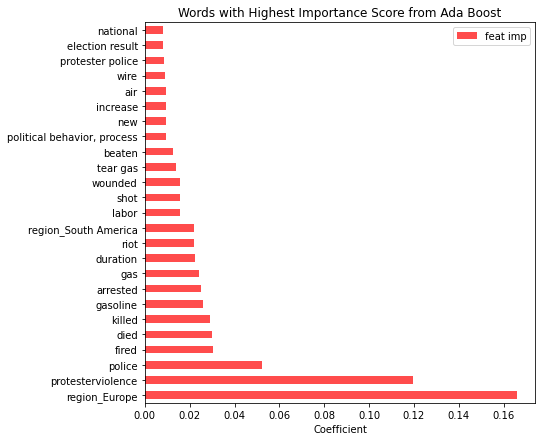

In [35]:
# Plot the importance scores for the most important features
imp.sort_values('feat imp', ascending = False).head(25).plot(kind= 'barh', color = 'red', alpha = 0.7, figsize = (7,7))
#plt.yticks(rotation = 70)
plt.xlabel('Coefficient')
plt.title('Words with Highest Importance Score from Ada Boost')
plt.savefig("../figs/importance_scores.png")

# Support Vector Classifier

In [72]:
# C values to GridSearch over
pgrid = {"C": np.linspace(0.0001, 1, 20)}

# Instantiate and fit a gridsearch model for this SVC!
svc = LinearSVC()

cv = StratifiedKFold(shuffle = True, random_state = 42)

gs = GridSearchCV(svc, pgrid, cv = 5, verbose=2, n_jobs=-1)
gs.fit(X_train, y_train)

print('Train score: ', gs.score(X_train, y_train))
print('Test score: ', gs.score(X_test, y_test))

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   54.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  5.9min finished
/Users/adrianchapman/Dev/virtualenvs/py3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Train score:  0.4733302625518194
Test score:  0.47278253661232383


In [ ]:
# Score model on training set.
print(f'Train accuracy = {gs.score(X_train, y_train)}')
# Score model on testing set.
print(f'Test accuracy = {gs.score(X_test, y_test)}')

In [73]:
# from: https://intellipaat.com/community/17347/scikit-learn-get-accuracy-scores-for-each-class

# Use classification report to view cuisine level scores

y_pred = gs.predict(X_test)

target_names = list(y_test.value_counts().index)

print(classification_report(y_test, y_pred, target_names=target_names, digits=4))

                 precision    recall  f1-score   support

         ignore     0.0904    0.1383    0.1094       253
crowd dispersal     0.0000    0.0000    0.0000       366
        arrests     0.0000    0.0000    0.0000       154
   accomodation     0.0000    0.0000    0.0000       630
       killings     0.5186    0.8725    0.6505      1921
       beatings     0.0000    0.0000    0.0000       192
      shootings     0.0000    0.0000    0.0000       103

       accuracy                         0.4728      3619
      macro avg     0.0870    0.1444    0.1086      3619
   weighted avg     0.2816    0.4728    0.3529      3619



/Users/adrianchapman/Dev/virtualenvs/py3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
